In [1]:
import pandas as pd
import numpy as np
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as pff
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("F:/Kaggle Data/Amazon Musical Instument Review/Musical_instruments_reviews.csv")
data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [3]:
#drop the missing value as data cleaning
data.isnull().sum().sort_values(ascending=False)
data=data.dropna()

#drop Columns
data.drop(['reviewerID', 'reviewerName', 'helpful'], axis=1, inplace= True)

#Rename
data=data.rename(columns={"asin":"Instrument_ID", "overall":"rating", "unixReviewTime":"unix_time"})
data

,Instrument_ID,reviewText,rating,summary,unix_time,reviewTime
0,1384719342,"Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,1384719342,The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,1384719342,The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,1384719342,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,1384719342,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...
10256,B00JBIVXGC,"Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,B00JBIVXGC,I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,B00JBIVXGC,I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,B00JBIVXGC,"Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


Creating feature 
1. Year
2. Lengh
3. Review
4. Sentiment

In [4]:
def sentiment(rating):
    if(int(rating) == 1 or  int(rating)==2 or int(rating)==3):
        return 0
    else:
        return 1

def length(text):
    return len(text)

#review
data['review'] = data['reviewText'] + " " + data["summary"]

#year
data['reviewTime'] = pd.to_datetime(data['reviewTime'])
data['year'] = data['reviewTime'].dt.year

#length
data["length"] = data["review"].apply(length)

#sentiment
data["sentiment"] = data['rating'].apply(sentiment)

data.drop(["reviewText", "summary", "reviewTime"], axis=1, inplace=True)
data

,Instrument_ID,rating,unix_time,review,year,length,sentiment
0,1384719342,5.0,1393545600,"Not much to write about here, but it does exac...",2014,273,1
1,1384719342,5.0,1363392000,The product does exactly as it should and is q...,2013,549,1
2,1384719342,5.0,1377648000,The primary job of this device is to block the...,2013,457,1
3,1384719342,5.0,1392336000,Nice windscreen protects my MXL mic and preven...,2014,236,1
4,1384719342,5.0,1392940800,This pop filter is great. It looks and perform...,2014,197,1
...,...,...,...,...,...,...,...
10256,B00JBIVXGC,5.0,1405814400,"Great, just as expected. Thank to all. Five S...",2014,50,1
10257,B00JBIVXGC,5.0,1404259200,I've been thinking about trying the Nanoweb st...,2014,3088,1
10258,B00JBIVXGC,4.0,1405987200,I have tried coated strings in the past ( incl...,2014,636,1
10259,B00JBIVXGC,4.0,1404172800,"Well, MADE by Elixir and DEVELOPED with Taylor...",2014,1656,1


In [5]:
data.describe()

,rating,unix_time,year,length,sentiment
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,4.488413,1.360531e+09,2012.662364,512.162902,0.879143
std,0.894568,3.778250e+07,1.262804,618.926741,0.325976
min,1.000000,1.095466e+09,2004.000000,15.000000,0.000000
25%,4.000000,1.343347e+09,2012.000000,185.000000,1.000000
50%,5.000000,1.368490e+09,2013.000000,309.000000,1.000000
75%,5.000000,1.388923e+09,2014.000000,582.000000,1.000000
max,5.000000,1.405987e+09,2014.000000,11345.000000,1.000000


Data Visualization

In [6]:
sentiment = data['sentiment'].value_counts()
labels = sentiment.index
size = sentiment.values
color = ['Blue', 'Red']
sentiment = go.Pie(
                    labels= labels, values=size,
                    marker = dict(colors=color), name = "Sentiment Pie", hole=.8)

df = [sentiment]

layout = go.Layout( title = "Sentiment foe AMI",
                   template = "plotly_dark"
                    )
fig = go.Figure( data=df,
               layout = layout)
fig.show()

That result give the 87.9% people had a positive sentiment i.e rating 4 and 5 as well 12.1% people gave a rating 1, 2 and 3.

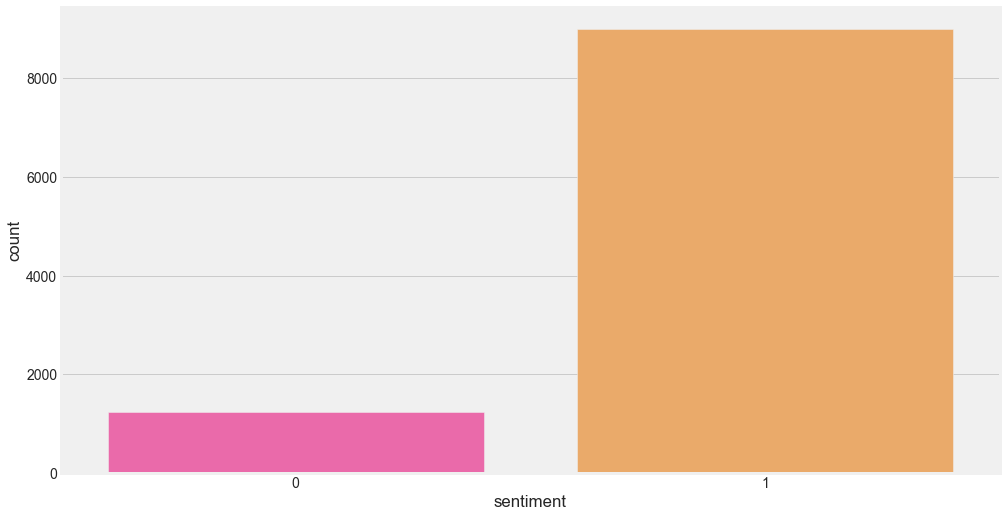

In [7]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
sns.countplot(data["sentiment"], data=data, palette='spring')
plt.show()

that result visualise more convenient as the more positive sentiment than other 

In [8]:
rating = data['rating'].value_counts()
color = ['red', 'yellow','green','orange','blue']

fig = go.Pie(labels=rating.index, values=rating.values,
            marker=dict(colors=color), name="Rating", hole=.4)
layout = go.Layout(title="% Rating AMI",
                  template = 'plotly_dark')
fig = go.Figure(data=[fig],
               layout = layout)
fig.show()

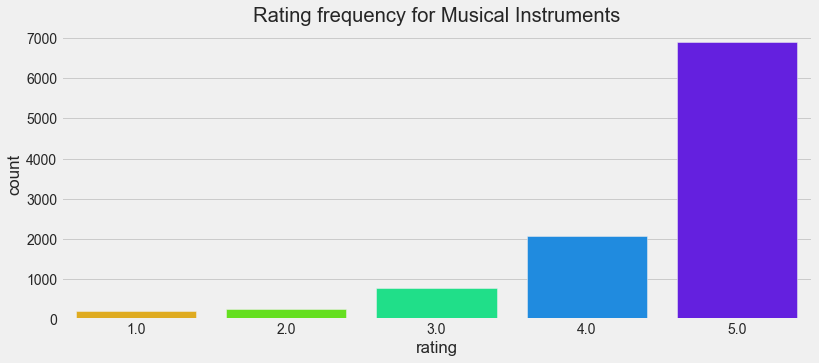

In [9]:
plt.figure(figsize=(12,5))
plt.style.use("fivethirtyeight")
sns.countplot(data["rating"], data=data, palette = "gist_rainbow")
plt.title("Rating frequency for Musical Instruments")
plt.show()

Find out which product maximum rating 

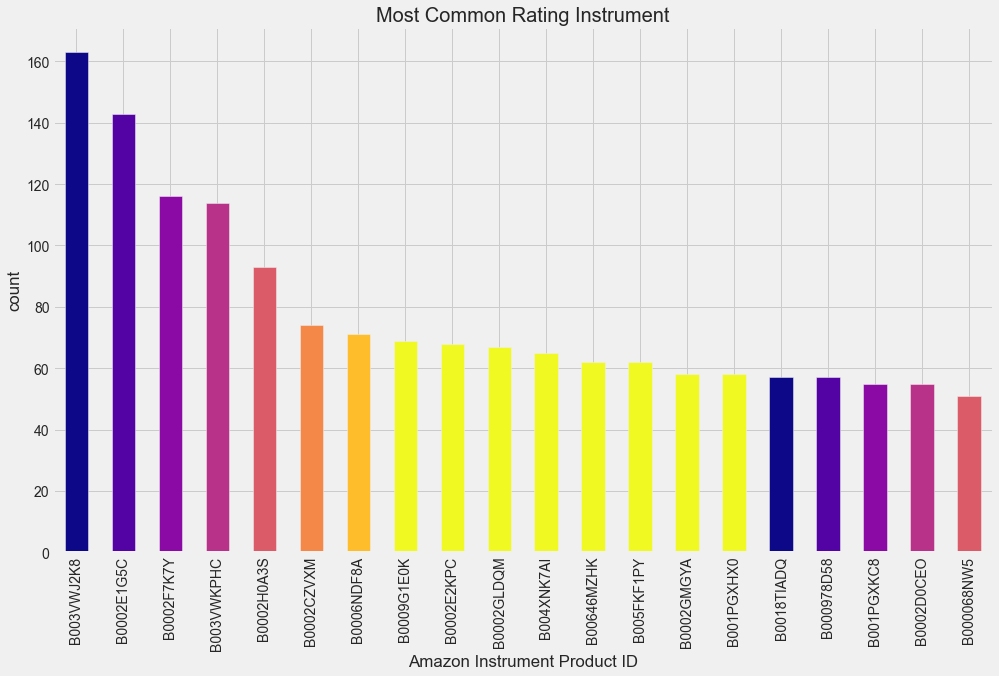

In [10]:
color = plt.cm.plasma(np.linspace(0,2,15))
data['Instrument_ID'].value_counts()[:20].plot.bar(color=color, figsize=(15,9))
plt.title('Most Common Rating Instrument',  fontsize=20)
plt.xlabel("Amazon Instrument Product ID")
plt.ylabel('count')
plt.show()


In [11]:
date = data['year'].value_counts()
color = ['white', 'red', 'pink','yellow', 'green','gold']

fig = go.Pie(labels=date.index, values=date.values,
            marker=dict(colors=color), name="Data Pie-chart", hole=.1)
layout = go.Layout(title = "Yearly % Ditribustion AMI",
                  template = 'plotly_dark')
fig = go.Figure(data=[fig], layout=layout)
fig.show()

In [12]:
fig = px.scatter(data, x="unix_time", y="rating",
                color = "sentiment", marginal_x = "histogram")
fig.show()

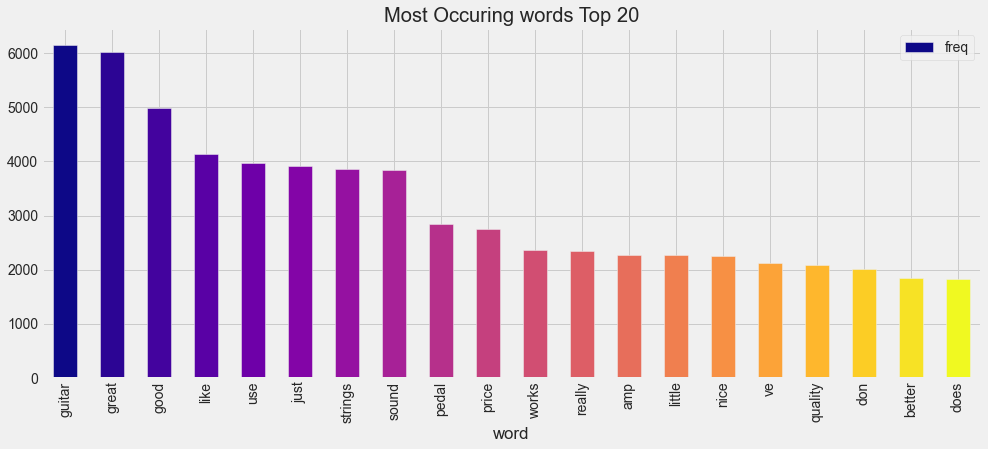

In [13]:
count = CountVectorizer(stop_words='english')
words = count.fit_transform(data.review)
sum_words = words.sum(axis=0)

word_freq = [(word,sum_words[0, idx]) for word, idx in count.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
freq = pd.DataFrame(word_freq, columns=['word', 'freq'])
data.head()

color = plt.cm.plasma(np.linspace(0,1,20))
freq.head(20).plot(x='word', y='freq', kind='bar', figsize=(15,6), color = color)
plt.title("Most Occuring words Top 20")
plt.show()

<Figure size 1080x432 with 0 Axes>

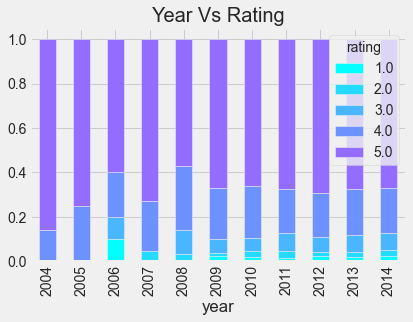

In [14]:
plt.figure(figsize=(15,6))
plt.style.use("fivethirtyeight")
x=pd.crosstab(data['year'], data['rating'])
color = plt.cm.cool(np.linspace(0,1,8))
x.div(x.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=color)
plt.title('Year Vs Rating', fontweight=20, fontsize=20)
plt.show()

In [15]:
trace = go.Scatter3d(x=data["length"], y=data["sentiment"], z=data["rating"],
                    name='Amazon Alexa', mode='markers', 
                    marker=dict(size=10, color=data['rating'], colorscale='Plasma'))

layout = go.Layout(title='Length Vs Sentiment Vs Rating',
                  margin = dict(l=0, r=0, b=0, t=0))

fig = go.Figure(data=[trace], layout=layout)
fig.show()

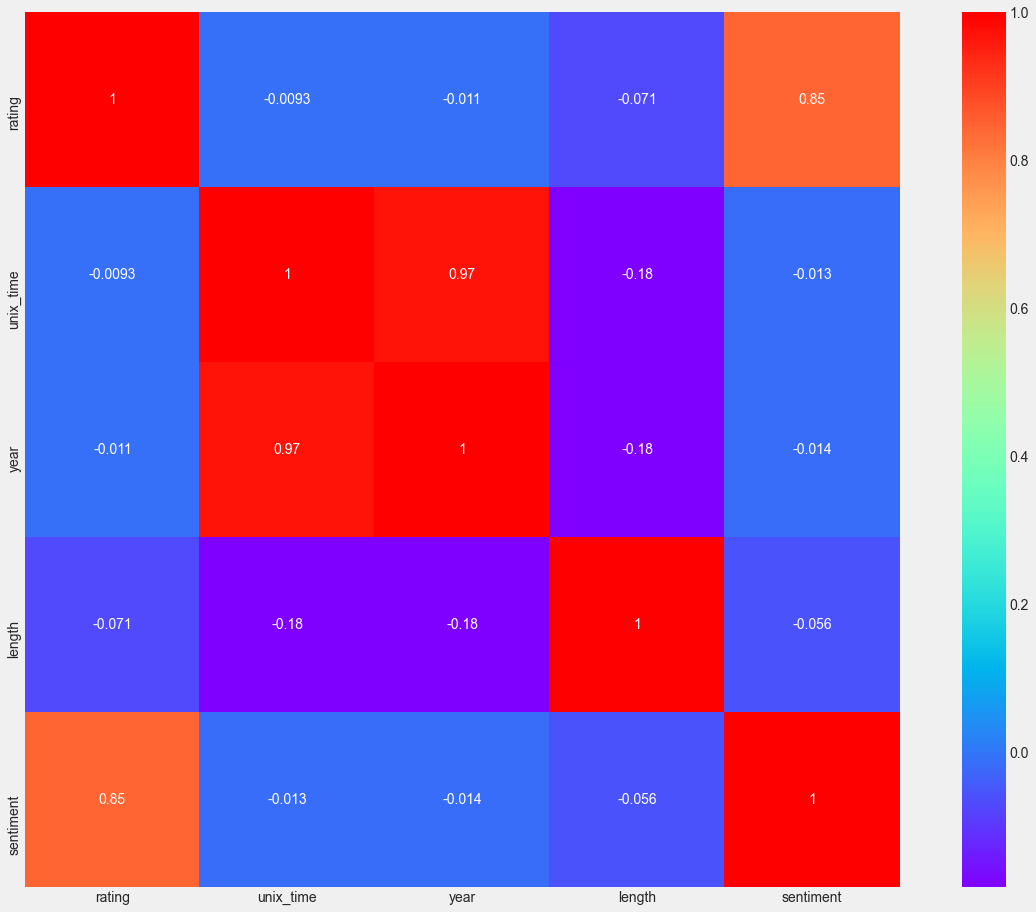

In [16]:
plt.figure(figsize=(20,15))
plt.style.use("fivethirtyeight")
sns.heatmap(data.corr(),square= True, annot=True, cmap="rainbow")
plt.show()